In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#x = seniority years
#y = salary in thousands

x = np.array([2,4,5,7,7,10,11,14])
y = np.array([37,45,46,48,50,52,56,64])

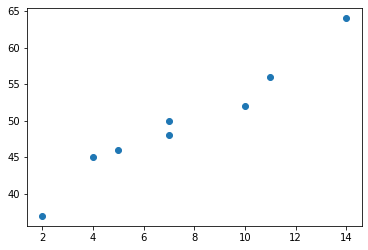

In [3]:
plt.scatter(x,y)

In [4]:
#positive number means both x,y can be large or small
#negative means one set is large and one set is small
print('Covariance: ', np.cov(x,y)[0,1])

Covariance:  31.0


In [5]:
#btw -1 and 1
print('Correlation: ', np.corrcoef(x,y)[0,1])

Correlation:  0.9758847765892668


In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
x

array([[ 2],
       [ 4],
       [ 5],
       [ 7],
       [ 7],
       [10],
       [11],
       [14]])

In [8]:
x[0][0]

2

In [9]:
from sklearn import linear_model

In [10]:
reg = linear_model.LinearRegression()

In [11]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.intercept_[0]

34.95454545454546

In [15]:
reg.coef_[0][0]

1.9727272727272718

In [18]:
print('Formula: f(x) = ' + format(reg.coef_[0][0],'.3f') + 'x + ' + format(reg.intercept_[0],'.3f'))

Formula: f(x) = 1.973x + 34.955


In [42]:
#manual calculation vs regression calculation
def f(x):
    return (1.973 * x) + 34.955

In [20]:
f(8)

50.739

In [45]:
reg.predict([[8]])

array([[50.73636364]])

In [47]:
f(16)

66.523

In [48]:
reg.predict([[16]])

array([[66.51818182]])

### Calculate the MSE  
1. Find the regression line.  
2. Insert your X values into the linear regression equation to find the new Y values (Y').  
3. Subtract the new Y value from the original to get the error.  
4. Square the errors.  
5. Add up the errors.  
6. Find the mean.  

In [22]:
df1 = pd.DataFrame()

In [26]:
df1['x'] = x.reshape(-1)

In [27]:
df1['y'] = y.reshape(-1)

In [28]:
df1

,x,y
0,2,37
1,4,45
2,5,46
3,7,48
4,7,50
5,10,52
6,11,56
7,14,64


In [30]:
df1['y-pred'] = df1['x'].apply(f)

In [31]:
df1

,x,y,y-pred
0,2,37,38.901
1,4,45,42.847
2,5,46,44.820
3,7,48,48.766
4,7,50,48.766
5,10,52,54.685
6,11,56,56.658
7,14,64,62.577


In [32]:
df1['diff'] = df1['y'] - df1['y-pred']

In [33]:
df1

,x,y,y-pred,diff
0,2,37,38.901,-1.901
1,4,45,42.847,2.153
2,5,46,44.820,1.180
3,7,48,48.766,-0.766
4,7,50,48.766,1.234
5,10,52,54.685,-2.685
6,11,56,56.658,-0.658
7,14,64,62.577,1.423


In [34]:
df1['square'] = df1['diff'] ** 2

In [35]:
df1

,x,y,y-pred,diff,square
0,2,37,38.901,-1.901,3.613801
1,4,45,42.847,2.153,4.635409
2,5,46,44.820,1.180,1.392400
3,7,48,48.766,-0.766,0.586756
4,7,50,48.766,1.234,1.522756
5,10,52,54.685,-2.685,7.209225
6,11,56,56.658,-0.658,0.432964
7,14,64,62.577,1.423,2.024929


In [36]:
df1['square'].sum()

21.41824

In [37]:
df1['square'].mean()

2.6772799999999997

In [39]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y,reg.predict(x))

2.6772727272727312

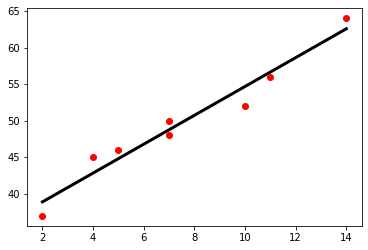

In [62]:
plt.scatter(x,y,color='red')
plt.plot(x,reg.predict(x),color='black',linewidth=3)